In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# Imposting Necssary Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

# Attributes Description :
# Data Set Description


**VARIABLE NAMES**: DESCRIPTION

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [4]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [5]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

In [6]:
#SevenSigma(df)

# Let's Handle Missing Values

In [7]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
25896,85886682,87399378,Hispanic,Male,[60-70),?,1,2,7,5,MC,Cardiology,57,1,21,0,0,0,250.6,427,535,9,NaN,NaN,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
23203,79360272,3429963,Caucasian,Male,[60-70),?,2,1,1,2,?,InternalMedicine,61,0,11,0,0,0,682,584,427,9,NaN,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
54386,158359476,52701984,AfricanAmerican,Female,[60-70),?,2,1,7,6,?,Cardiology,37,3,16,0,0,0,414,428,424,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
79907,245646150,90050157,Caucasian,Female,[50-60),?,3,1,7,5,MD,Emergency/Trauma,83,0,31,0,0,1,348,290,250.5,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
63040,175395498,23326641,AfricanAmerican,Male,[50-60),?,1,1,7,5,BC,Family/GeneralPractice,41,0,22,0,2,3,486,491,491,5,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO


In [8]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

In [9]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [10]:
df['race']=df['race'].apply(lambda x : 'Other' if x=='?' else x)

In [11]:
df.drop(index=[30506, 75551, 82573],inplace=True)

In [12]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature


In [13]:
df['age']=replace_age_ranges(df['age'])

In [14]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [15]:
#Discharged Home: 1, 6, 8
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)


In [16]:
# Unknown/Invalid: 9, 15, 17, 20, 21
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)


In [17]:
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)

In [18]:
df.drop(index=index,inplace=True)

In [19]:
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [20]:
def diag_cluster(col,diag_list):
    for x in df[col]:

      if 'V' in x or 'E' in x: 

        diag_list.append(18)
        continue

      elif 1<=float(x)<=139:

        diag_list.append(1)

      elif 140<=float(x)<=239:

        diag_list.append(2)

      elif 240<=float(x)<=279:

        diag_list.append(3)

      elif 280<=float(x)<=289:

        diag_list.append(4)

      elif 290<=float(x)<=319:

        diag_list.append(5)

      elif 320<=float(x)<=389:

        diag_list.append(6)

      elif 390<=float(x)<=459:

        diag_list.append(7)

      elif 460<=float(x)<=519:

        diag_list.append(8)

      elif 520<=float(x)<=579:

        diag_list.append(9)

      elif 580<=float(x)<=629:

        diag_list.append(10)

      elif 630<=float(x)<=679:

        diag_list.append(11)

      elif 680<=float(x)<=709:

        diag_list.append(12)

      elif 710<=float(x)<=739:

        diag_list.append(13)

      elif 740<=float(x)<=759:

        diag_list.append(14)

      elif 760<=float(x)<=779:

        diag_list.append(15)

      elif 780<=float(x)<=799:

        diag_list.append(16)

      elif 800<=float(x)<=999:

        diag_list.append(17)

In [21]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [22]:
df['diag_1']=diag1_list
df['diag_2']=diag2_list
df['diag_3']=diag3_list

In [23]:
medicines=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

for col in medicines:
    df[col]=df[col].apply(lambda x : 0 if x=='No' else 1)

In [24]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [25]:
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [26]:
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [27]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

In [28]:
df.drop(index=df[df['discharge_disposition_id']==11].index,inplace=True)

In [34]:
df.head(10) 

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,1,2,1,1,7,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,1,3,1,1,7,2,11,5,13,2,0,1,11,3,18,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,4,1,1,7,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,2,1,5,1,1,7,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
5,2,1,6,2,1,1,3,31,6,16,0,0,0,7,7,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,2,1,7,3,1,1,4,70,1,21,0,0,0,7,7,18,7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
7,2,1,8,1,1,7,5,73,0,12,0,0,0,7,8,3,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,2,1,9,2,1,4,13,68,2,28,0,0,0,7,7,1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
9,2,1,10,3,3,4,12,33,3,18,0,0,0,7,2,8,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
10,0,1,5,1,1,7,9,47,2,17,0,0,0,3,7,17,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [30]:
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [31]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [53]:
X=df.drop(columns='readmitted')
y=df['readmitted']

In [76]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']]
y=df['readmitted']

In [45]:
X,y=X_res, y_res

In [79]:
6253/63080*100

9.91280913126189

In [78]:
y.value_counts()

readmitted
0    63080
1     6253
Name: count, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)


In [87]:
Counter(y_train)

Counter({1: 47324, 0: 47296})

In [97]:
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler
import catboost
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        #max_leaves=trial.suggest_int("max_leaves",15,40),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf",51,120),
        #early_stopping_rounds=trial.suggest_int("early_stopping_rounds",70,200),
        loss_function='Logloss',
        eval_metric='F1',
        verbose=False,
        task_type='GPU'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [98]:
%%time

optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=31)

CPU times: user 6min 18s, sys: 2min 3s, total: 8min 22s
Wall time: 4min 35s


In [99]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  31
Best trial:
  Value:  0.9072606214331008
  Params: 
    iterations: 813
    learning_rate: 0.09425433483853037
    depth: 10
    l2_leaf_reg: 0.00025117779012403147
    bootstrap_type: Bayesian
    random_strength: 5.2681683837260795
    bagging_temperature: 9.466232535470276
    od_type: Iter
    od_wait: 22
    min_data_in_leaf: 83


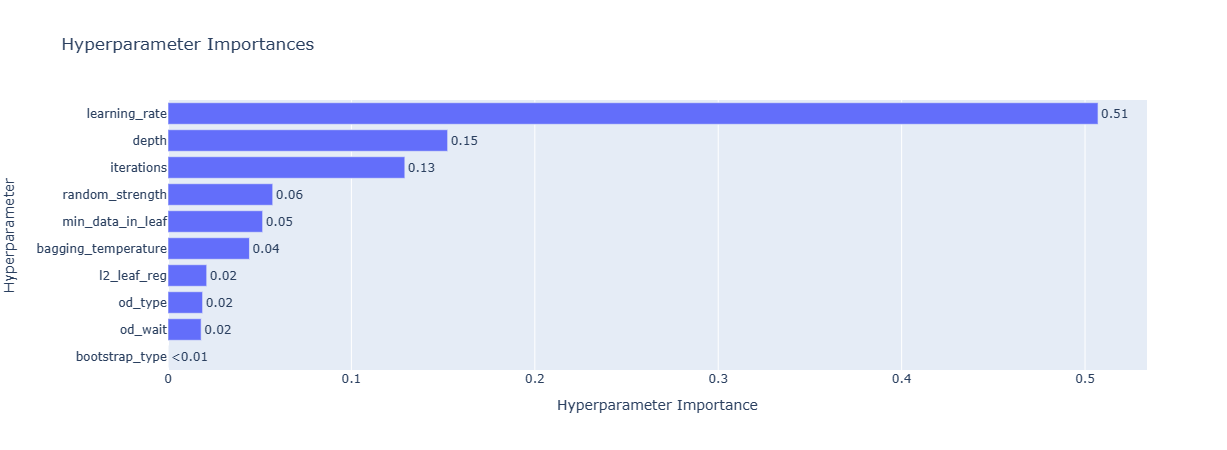

In [101]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [102]:
study.best_trial

FrozenTrial(number=26, state=TrialState.COMPLETE, values=[0.9072606214331008], datetime_start=datetime.datetime(2024, 1, 18, 10, 26, 51, 225858), datetime_complete=datetime.datetime(2024, 1, 18, 10, 27, 10, 390489), params={'iterations': 813, 'learning_rate': 0.09425433483853037, 'depth': 10, 'l2_leaf_reg': 0.00025117779012403147, 'bootstrap_type': 'Bayesian', 'random_strength': 5.2681683837260795, 'bagging_temperature': 9.466232535470276, 'od_type': 'Iter', 'od_wait': 22, 'min_data_in_leaf': 83}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.001, step=None), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'l2_leaf_reg': FloatDistribution(high=100.0, log=True, low=1e-08, step=None), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian',)), 'random_strength': FloatDistribution(high=10.0, log=True, low=1e-08, step

In [ ]:
df['readmitted'].value_counts()

In [81]:
%%time
from collections import Counter  

from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)

X_res, y_res = sm.fit_resample(X, y)

CPU times: user 1.14 s, sys: 472 ms, total: 1.61 s
Wall time: 1 s


In [75]:
#over and under sampled
ov_X=X_resampled
ov_y=y_resampled

In [103]:
#params={'iterations': 513, 'learning_rate': 0.0397842000536864, 'depth': 7, 'l2_leaf_reg': 0.05206518524157017, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6530700573768906e-07, 'bagging_temperature': 0.1394386439385641, 'od_type': 'IncToDec', 'od_wait': 30}
#params={'iterations': 810, 'learning_rate': 0.02656293600669053, 'depth': 5, 'l2_leaf_reg': 0.28259770270974677, 'bootstrap_type': 'Bayesian', 'random_strength': 3.002070542128706e-05, 'bagging_temperature': 0.7065794059168207, 'od_type': 'IncToDec', 'od_wait': 28}
#params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}
#params={'iterations': 226, 'learning_rate': 0.002490020818620744, 'depth': 9, 'l2_leaf_reg': 48.15215820395775, 'bootstrap_type': 'Bayesian', 'random_strength': 6.6193844201488494e-06, 'bagging_temperature': 6.923226156693141, 'od_type': 'Iter', 'od_wait': 13}
# over sampled full features
#params={'iterations': 899, 'learning_rate': 0.06966733523156289, 'depth': 9, 'l2_leaf_reg': 8.071917904799597e-08, 'bootstrap_type': 'Bayesian', 'random_strength': 0.001980689035613274, 'bagging_temperature': 5.000998021136371, 'od_type': 'IncToDec', 'od_wait': 17}
# over sampled 
# params={'iterations': 881, 'learning_rate': 0.01961057467284439, 'depth': 10, 'l2_leaf_reg': 0.0026174150623770134, 'bootstrap_type': 'Bayesian', 'random_strength': 2.191236365450965e-06, 'bagging_temperature': 5.6475486877966965, 'od_type': 'IncToDec', 'od_wait': 42}

params={'iterations': 813, 'learning_rate': 0.09425433483853037, 'depth': 10, 'l2_leaf_reg': 0.00025117779012403147, 'bootstrap_type': 'Bayesian', 'random_strength': 5.2681683837260795, 'bagging_temperature': 9.466232535470276, 'od_type': 'Iter', 'od_wait': 22, 'min_data_in_leaf': 83}

In [104]:
model=catboost.CatBoostClassifier(**params,task_type='GPU',verbose=False)

In [105]:
model.fit(X_train,y_train)

In [113]:
y_pred=model.predict(X_test)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     15760
           1       0.62      0.78      0.69      1574

    accuracy                           0.94     17334
   macro avg       0.80      0.87      0.83     17334
weighted avg       0.95      0.94      0.94     17334



In [109]:
listee=[]
for x in model.predict_proba(X_test):
    listee.append(max(x))

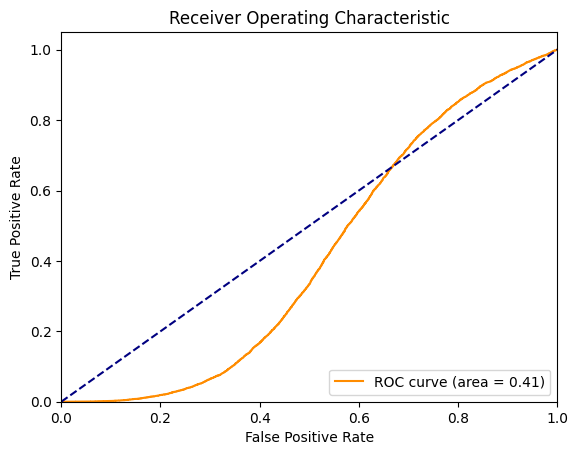

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels and predicted probabilities
y_true = y_test
y_probas =np.array(listee)

# Calculate the fpr and tpr for different threshold settings
fpr, tpr, thresholds = roc_curve(y_true, y_probas)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

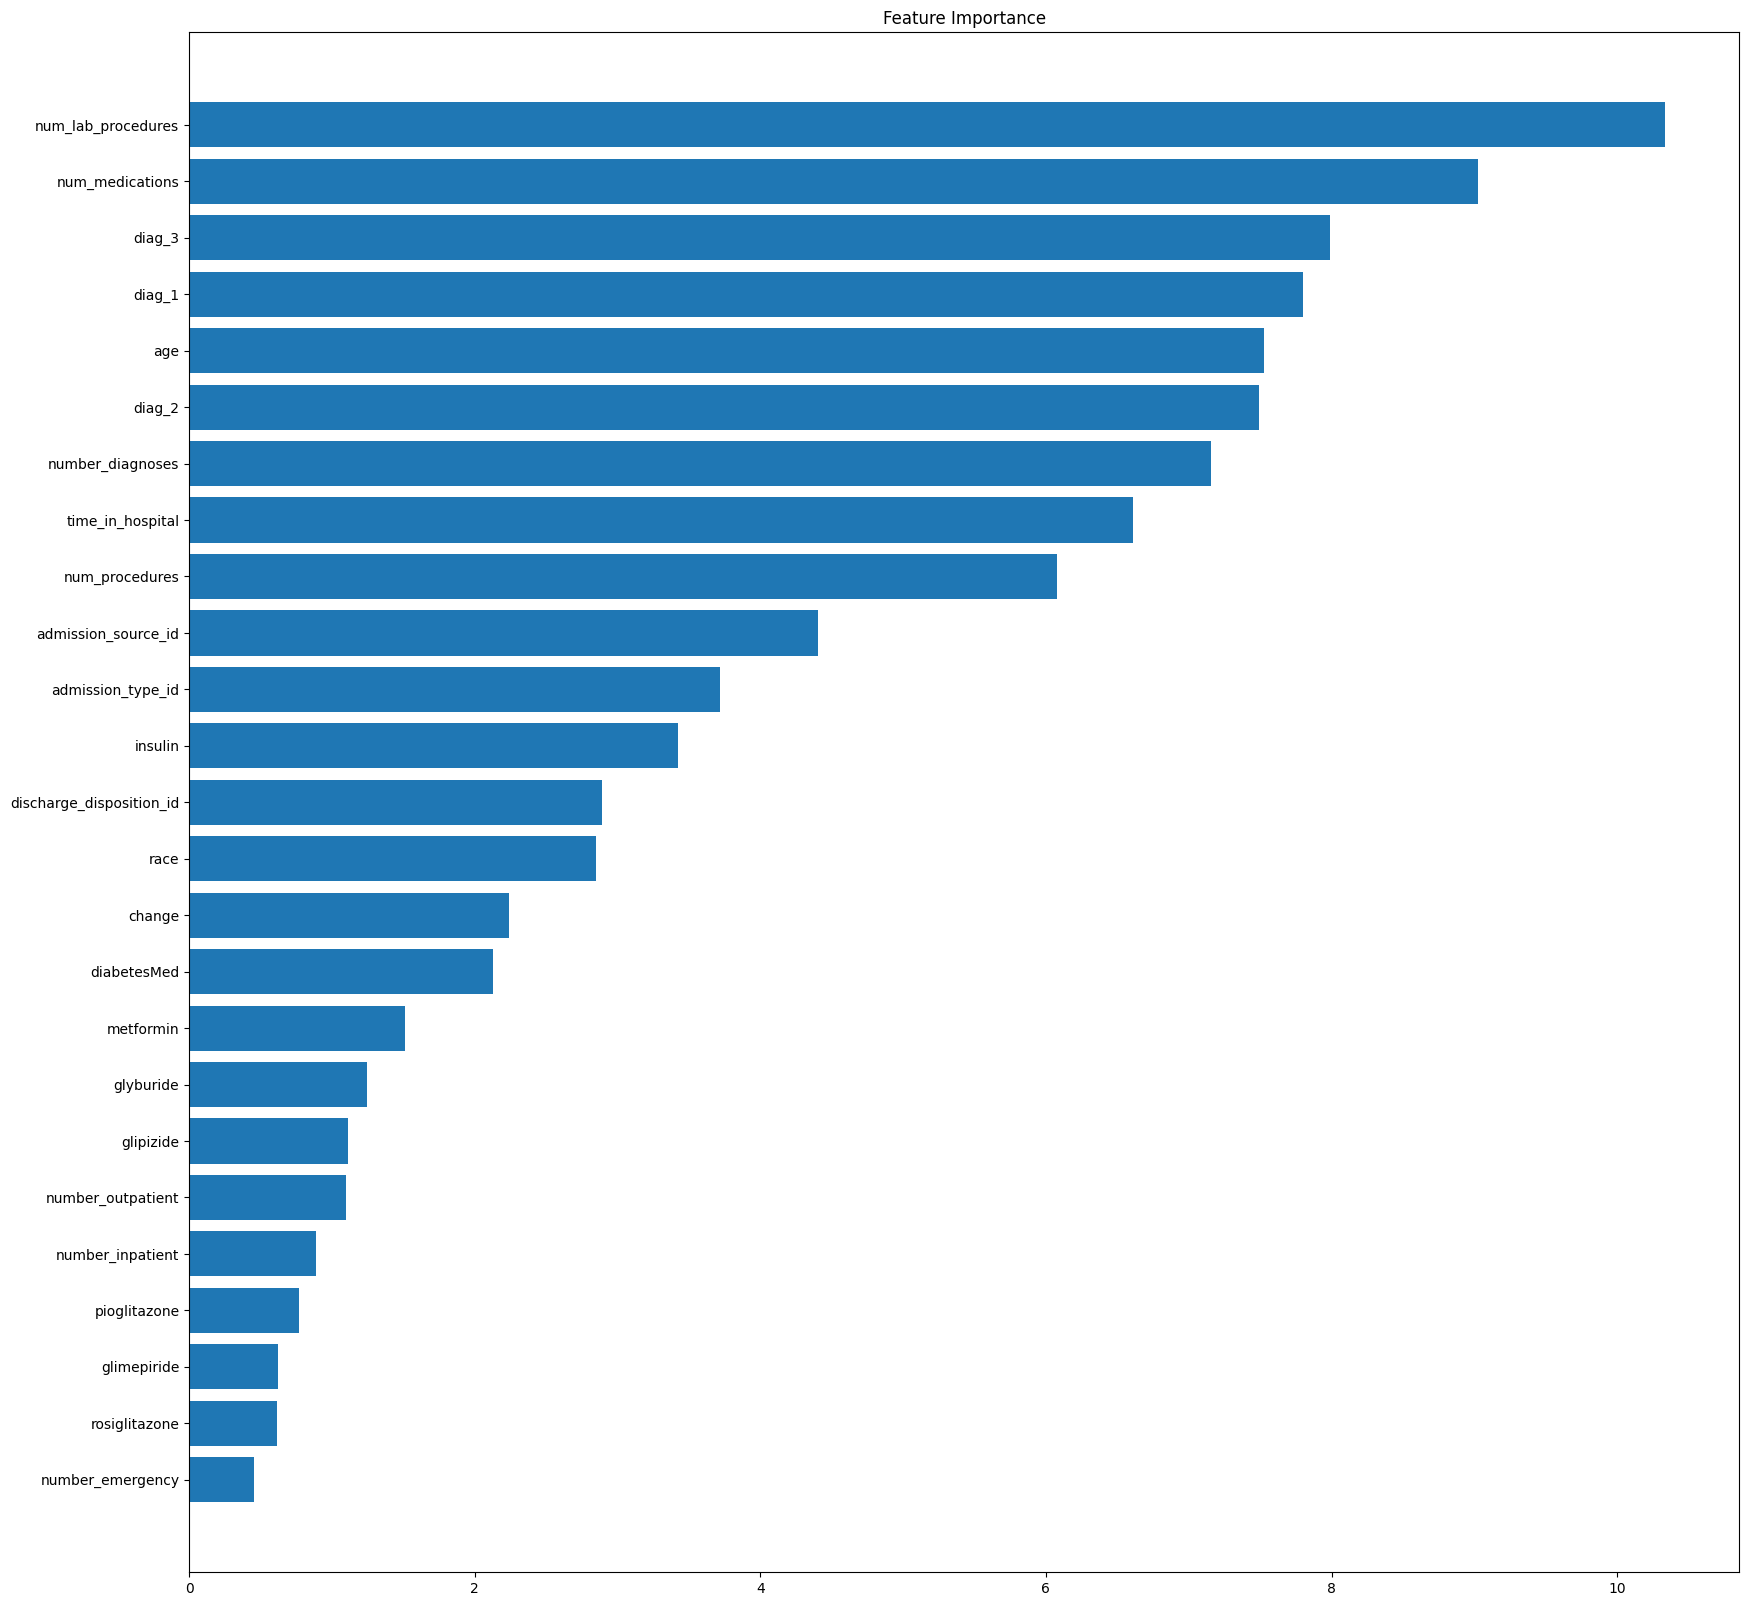

In [111]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [82]:
sorted_idx

array([ 1, 37, 36, 35, 22, 30, 34, 29, 31, 25, 20, 28, 19, 33, 18, 11, 21,
       12, 26, 27, 24, 10, 23, 17, 38, 39, 32,  4,  3,  0,  5,  8, 16,  6,
       14,  2, 13, 15,  9,  7])

In [64]:
temp=[ 1, 37, 36, 35, 22, 30, 34, 29, 31, 25, 20, 28, 19, 33, 18, 11, 21,
       12, 26, 27, 24, 10, 23, 17, 38, 39, 32,  4,  3,  0,  5,  8, 16,  6,
       14,  2, 13, 15,  9,  7]

In [60]:
sorted_idx

array([ 1, 37, 36, 35, 34, 30, 29, 25, 22, 31, 20, 28, 33, 18, 19, 11, 12,
       21, 27, 26, 10, 24, 23, 39, 38, 17,  0,  4, 32,  3,  5,  6,  8,  2,
       16, 15, 14, 13,  9,  7])

In [68]:
X_test.columns[temp[:25]]

Index(['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency'],
      dtype='object')

In [63]:
X_test.columns[sorted_idx[:25]]

Index(['num_lab_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'age', 'num_procedures', 'time_in_hospital',
       'admission_source_id', 'admission_type_id', 'insulin',
       'discharge_disposition_id', 'race', 'metformin', 'change',
       'diabetesMed', 'glipizide', 'glyburide', 'number_outpatient',
       'pioglitazone', 'rosiglitazone', 'glimepiride', 'number_inpatient',
       'number_emergency'],
      dtype='object')

In [62]:
sorted_idx=sorted_idx[::-1]

In [ ]:
import os
os.cpu_count()

In [ ]:
df.columns

In [ ]:
df.groupby('patient_nbr')['readmitted']=='<30'

In [ ]:
df['readmitted']

In [ ]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)